<a href="https://colab.research.google.com/github/DarshaPadmanban/24ADI003_24BAD017/blob/main/Exercise_4(SC_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            

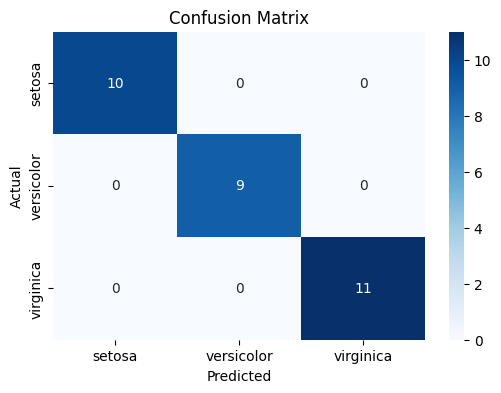

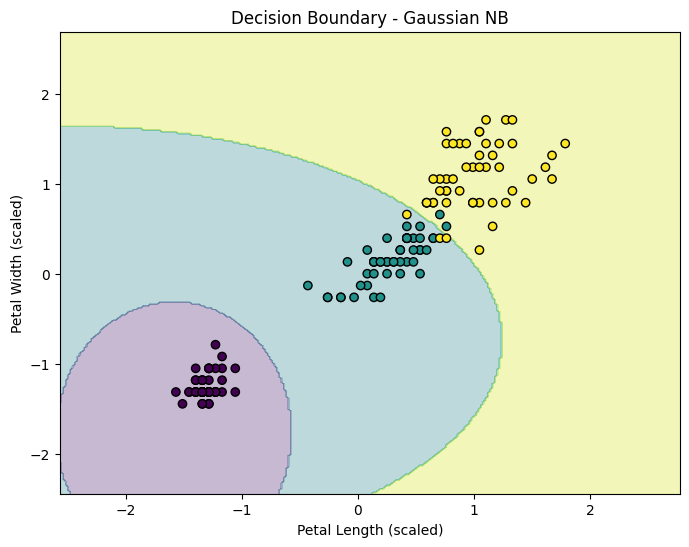

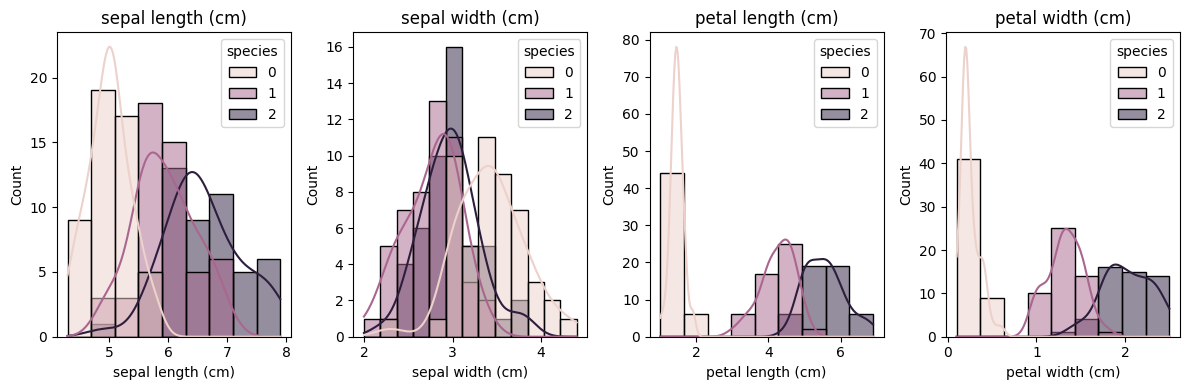

In [1]:
# ============================================
# GAUSSIAN NAIVE BAYES - IRIS CLASSIFICATION
# ============================================

# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# ============================================
# 2. Load Iris Dataset
# ============================================
iris = load_iris()

X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df["species"] = y

print("Dataset Sample:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# ============================================
# 3. Data Inspection & Preprocessing
# ============================================
print("\nMissing Values:")
print(df.isnull().sum())

# ============================================
# 4. Feature Scaling
# ============================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ============================================
# 5. Train-Test Split
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ============================================
# 6. Train Gaussian Naive Bayes
# ============================================
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# ============================================
# 7. Predict Species Labels
# ============================================
y_pred = gnb.predict(X_test)

# ============================================
# 8. Model Evaluation
# ============================================
print("\n--- Gaussian Naive Bayes Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# ============================================
# 9. Compare Predictions vs Actual Labels
# ============================================
comparison = pd.DataFrame({
    "Actual": [target_names[i] for i in y_test],
    "Predicted": [target_names[i] for i in y_pred]
})
print("\nActual vs Predicted:")
print(comparison.head(10))

# ============================================
# 10. Analyze Class Probabilities
# ============================================
probabilities = gnb.predict_proba(X_test)
print("\nClass Probabilities (first 5 rows):")
print(probabilities[:5])

# ============================================
# 11. Compare with Logistic Regression (Optional)
# ============================================
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("\n--- Logistic Regression Performance ---")
print("Accuracy:", accuracy_score(y_test, lr_pred))

# ============================================
# Visualization
# ============================================

# ============================================
# Confusion Matrix
# ============================================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ============================================
# Decision Boundary Plot (using 2 features)
# Using Petal Length & Petal Width
# ============================================
X_two = iris.data[:, 2:4]  # petal length & width
y_two = iris.target

scaler2 = StandardScaler()
X_two_scaled = scaler2.fit_transform(X_two)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_two_scaled, y_two, test_size=0.2, random_state=42
)

model2 = GaussianNB()
model2.fit(X_train2, y_train2)

# Create mesh grid
x_min, x_max = X_two_scaled[:, 0].min() - 1, X_two_scaled[:, 0].max() + 1
y_min, y_max = X_two_scaled[:, 1].min() - 1, X_two_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)

scatter = plt.scatter(X_two_scaled[:,0], X_two_scaled[:,1],
                      c=y_two, edgecolor='k')

plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("Decision Boundary - Gaussian NB")
plt.show()

# ============================================
# Probability Distribution Plots
# ============================================
plt.figure(figsize=(12,4))

for i in range(4):
    plt.subplot(1,4,i+1)
    sns.histplot(df, x=feature_names[i], hue="species", kde=True)
    plt.title(feature_names[i])

plt.tight_layout()
plt.show()